# Time Series Forecast - Wine Data

In [1]:
import pandas as pd

### 1.Read the data as an appropriate Time Series data and plot the data.

In [2]:
# Reading data frames
sdf = pd.read_csv("Sparkling.csv")
rdf = pd.read_csv("Rose.csv")

In [3]:
print("Sparkling Wine Top 5 Rows")
display(sdf.head())
print("Sparkling Wine Bottom 5 Rows")
display(sdf.tail())
print("Rose Wine Top 5 Rows")
display(rdf.head())
print("Rose Wine Bottom 5 Rows")
display(rdf.tail())

Sparkling Wine Top 5 Rows


,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


Sparkling Wine Bottom 5 Rows


,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


Rose Wine Top 5 Rows


,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


Rose Wine Bottom 5 Rows


,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


* We have Monthly wine data from January 1980 to July 1995 for both datasets

In [4]:
# Creating date range
TimeStamp = pd.date_range(start = '1980-01-01', periods = len(sdf), freq = 'M')

In [5]:
TimeStamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [6]:
# Adding Date Range in Dataframes
sdf['TimeStamp'] = TimeStamp
rdf['TimeStamp'] = TimeStamp

In [7]:
sdf.drop('YearMonth', axis = 1, inplace = True)
sdf.set_index('TimeStamp', inplace = True)
sdf.head()

,Sparkling
TimeStamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [8]:
rdf.drop('YearMonth', axis = 1, inplace = True)
rdf.set_index('TimeStamp', inplace = True)
rdf.head()

,Rose
TimeStamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [9]:
# Ploting Sparkling Wine Data
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

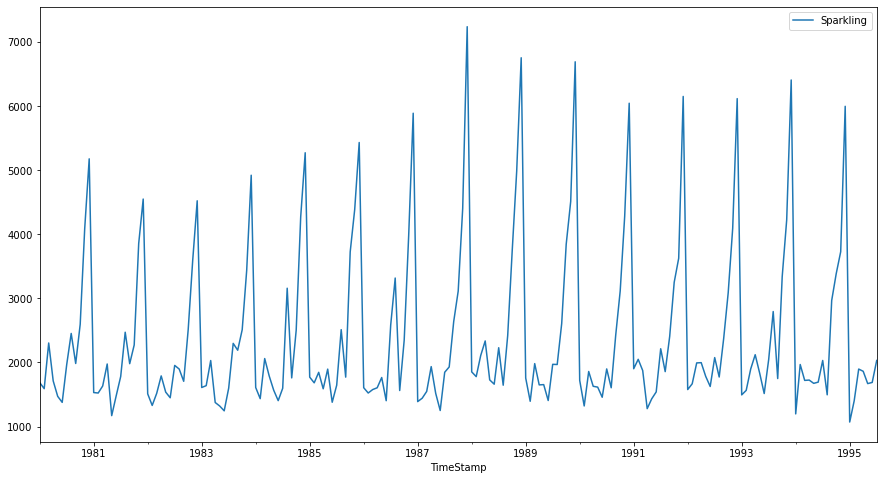

In [10]:
sdf.plot();

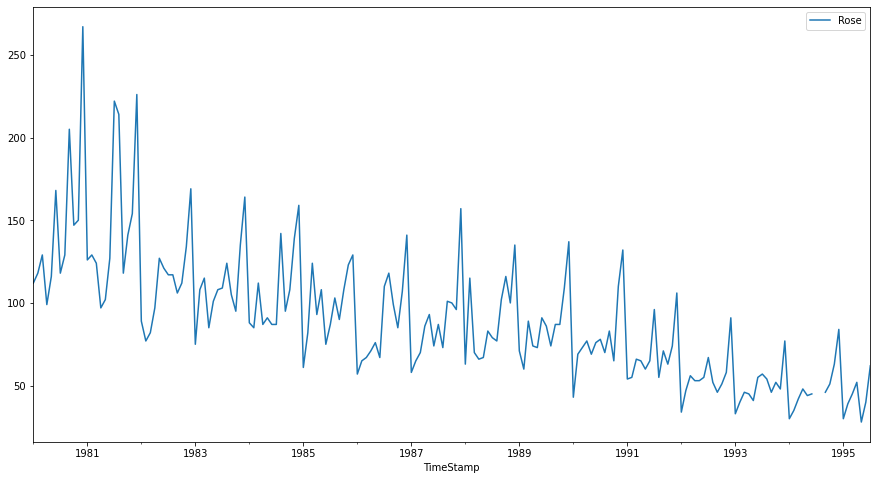

In [11]:
rdf.plot();

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [12]:
print("NULL in Rose Wine Data: {0}".format(rdf['Rose'].isnull().sum()))
print("NULL in Sparkling Wine Data: {0}".format(sdf['Sparkling'].isnull().sum()))

NULL in Rose Wine Data: 2
NULL in Sparkling Wine Data: 0


In [13]:
rdf[rdf['Rose'].isnull()]

,Rose
TimeStamp,
1994-07-31,NaN
1994-08-31,NaN


In [14]:
rdf = rdf.interpolate(method = 'linear')

<AxesSubplot:xlabel='TimeStamp'>

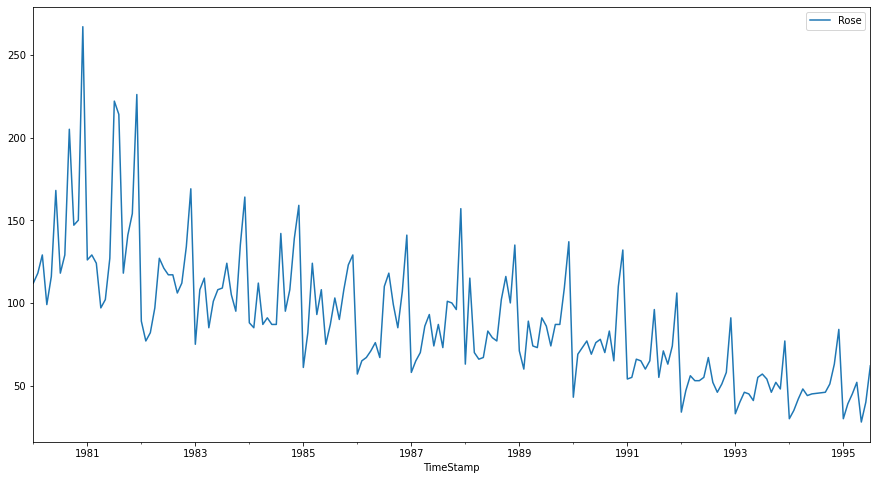

In [15]:
rdf.plot()

In [16]:
# Info about Dataframe
print(sdf.info())
print(rdf.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB
None


In [17]:
# Shape Dataframe
print(sdf.shape)
print(rdf.shape)

(187, 1)
(187, 1)


In [18]:
# Describe
sdf.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [19]:
# Describe
rdf.describe()

,Rose
count,187.000000
mean,89.914439
std,39.238325
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


In [20]:
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

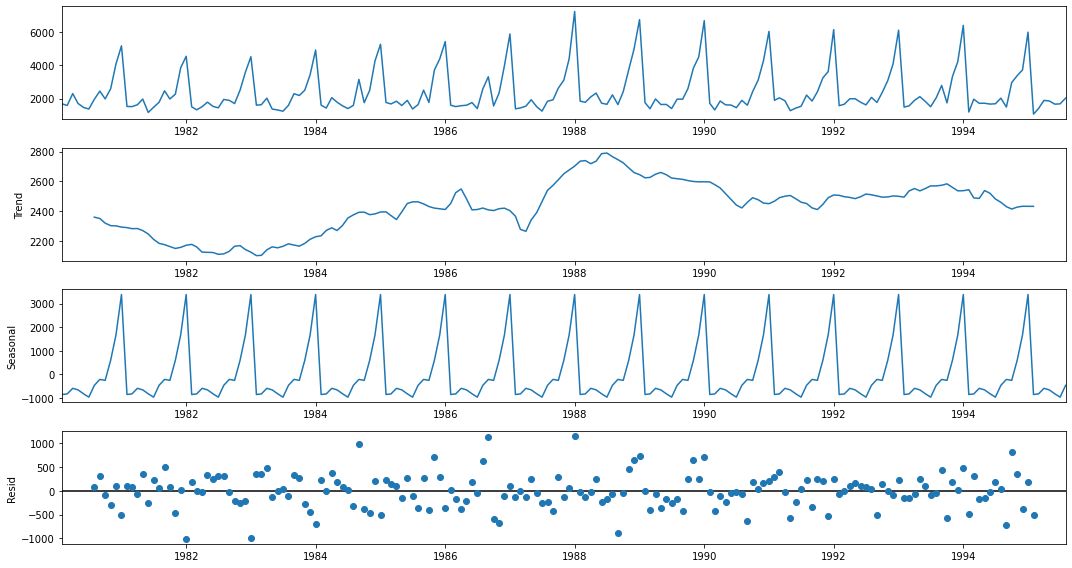

In [21]:
# Sparkling Wine
sdecompose = seasonal_decompose(sdf,model='additive')
sdecompose.plot();

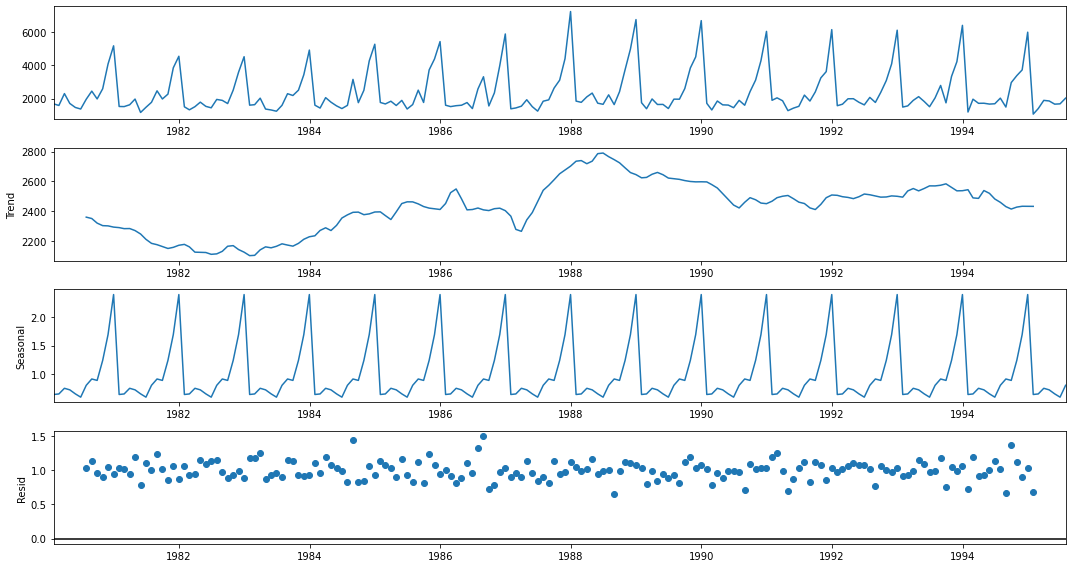

In [22]:
# Sparkling Wine
sdecompose = seasonal_decompose(sdf,model='multiplicative')
sdecompose.plot();

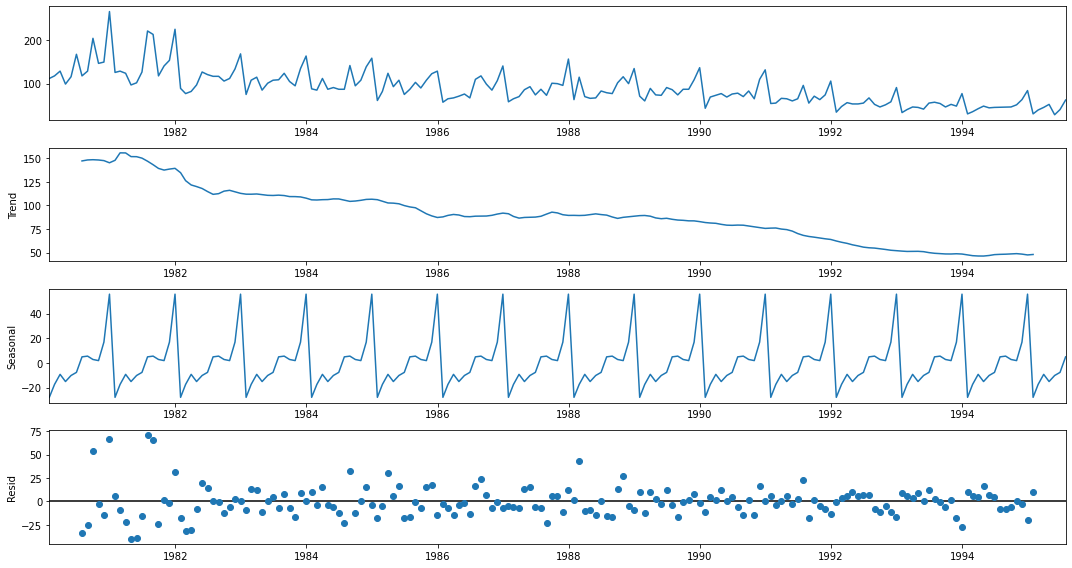

In [23]:
# Rose Wine

rdecompose = seasonal_decompose(rdf,model='additive')
rdecompose.plot();

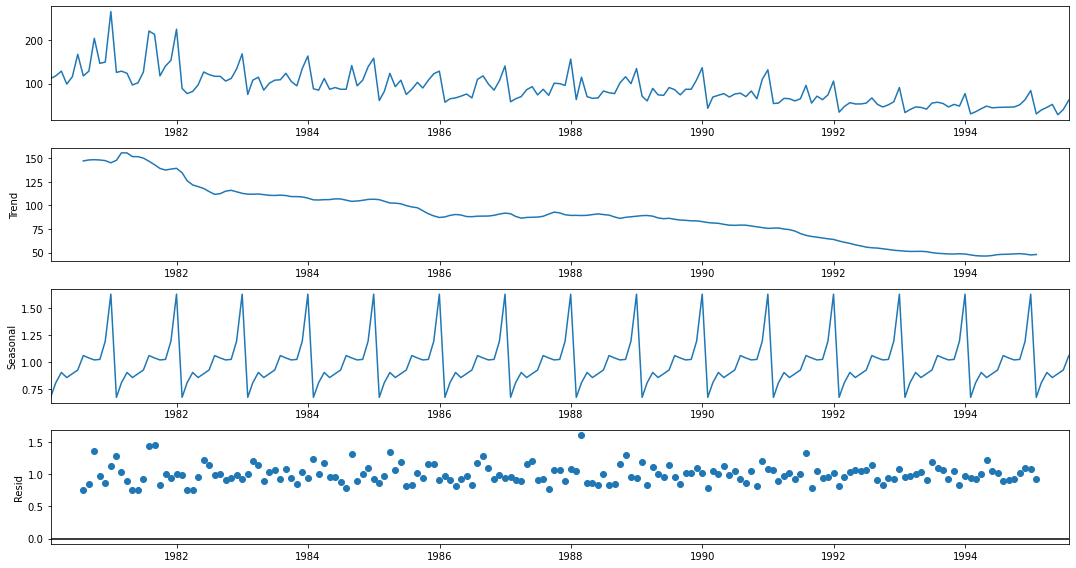

In [24]:
# Rose Wine
rdecompose = seasonal_decompose(rdf,model='multiplicative')
rdecompose.plot();

### 3. Split the data into training and test. The test data should start in 1991.

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# Sparkling Wine Data

sTrain = sdf[sdf.index.year < 1991]
sTest = sdf[sdf.index.year >= 1991]

In [27]:
sTrain.shape

(132, 1)

In [28]:
sTest.shape

(55, 1)

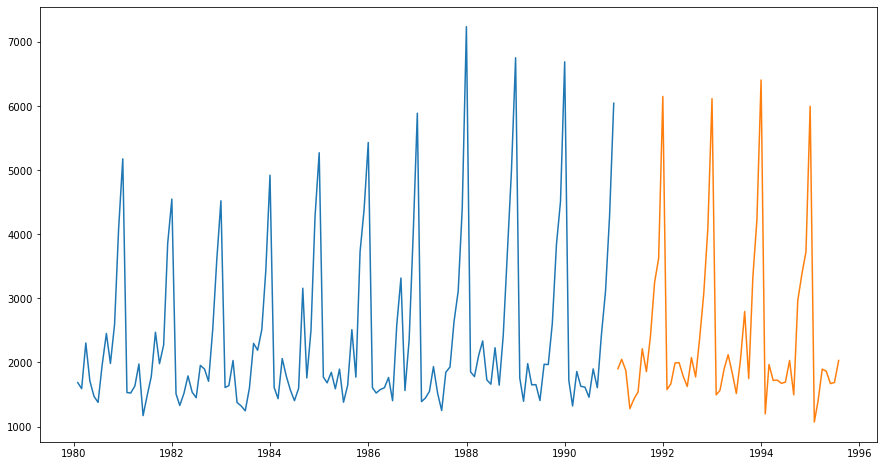

In [29]:
plt.figure(figsize=(15,8))
plt.plot(sTrain, label='Train')
plt.plot(sTest, label='Test')

In [30]:
# Rose Wine Data

rTrain = rdf[rdf.index.year < 1991]
rTest = rdf[rdf.index.year >= 1991]

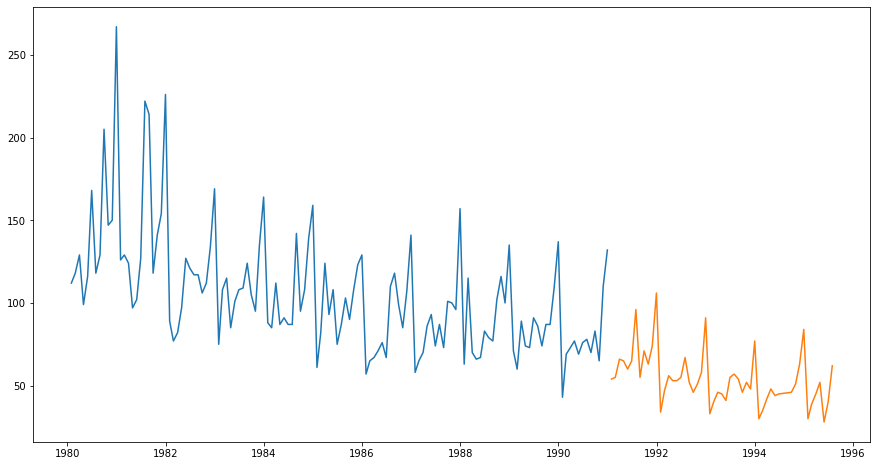

In [31]:
plt.figure(figsize=(15,8))
plt.plot(rTrain, label='Train')
plt.plot(rTest, label='Test')

### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

#### 1. Linear Regression Model

In [32]:
strain_time = [i+1 for i in range(len(sTrain))]
stest_time = [i+133 for i in range(len(sTest))]
print('Training Time instance','\n',strain_time)
print('Test Time instance','\n',stest_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [33]:
rtrain_time = [i+1 for i in range(len(rTrain))]
rtest_time = [i+133 for i in range(len(rTest))]
print('Training Time instance','\n',rtrain_time)
print('Test Time instance','\n',rtest_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [34]:
LinearRegression_strain = sTrain.copy()
LinearRegression_stest = sTest.copy()

In [35]:
LinearRegression_rtrain = rTrain.copy()
LinearRegression_rtest = rTest.copy()

In [36]:
LinearRegression_strain['time'] = strain_time
LinearRegression_stest['time'] = stest_time

LinearRegression_rtrain['time'] = rtrain_time
LinearRegression_rtest['time'] = rtest_time

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lrs = LinearRegression()
lrr = LinearRegression()

lrs.fit(LinearRegression_strain[['time']],LinearRegression_strain['Sparkling'])
lrr.fit(LinearRegression_rtrain[['time']],LinearRegression_rtrain['Rose'])

LinearRegression()

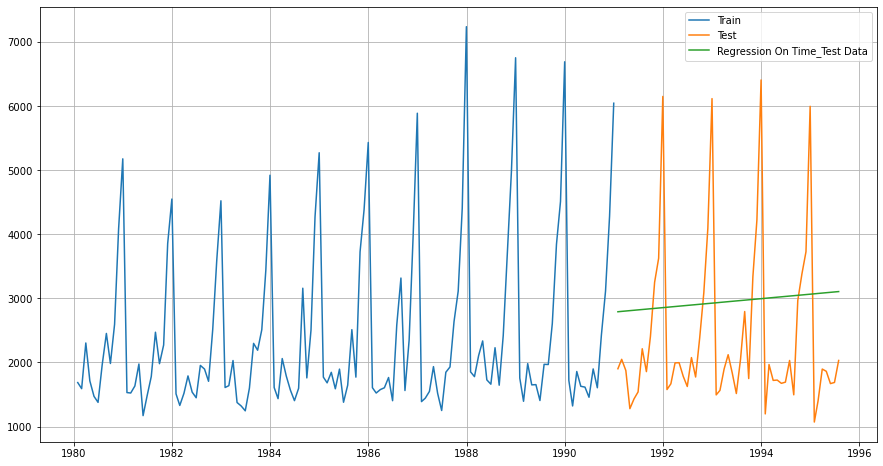

In [39]:
# Sparkling

strain_predictions_model1         = lrs.predict(LinearRegression_strain[['time']])
LinearRegression_strain['RegOnTime'] = strain_predictions_model1

stest_predictions_model1         = lrs.predict(LinearRegression_stest[['time']])
LinearRegression_stest['RegOnTime'] = stest_predictions_model1

plt.figure(figsize = (15,8))
plt.plot(sTrain['Sparkling'], label='Train')
plt.plot(sTest['Sparkling'], label='Test')
plt.plot(LinearRegression_stest['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

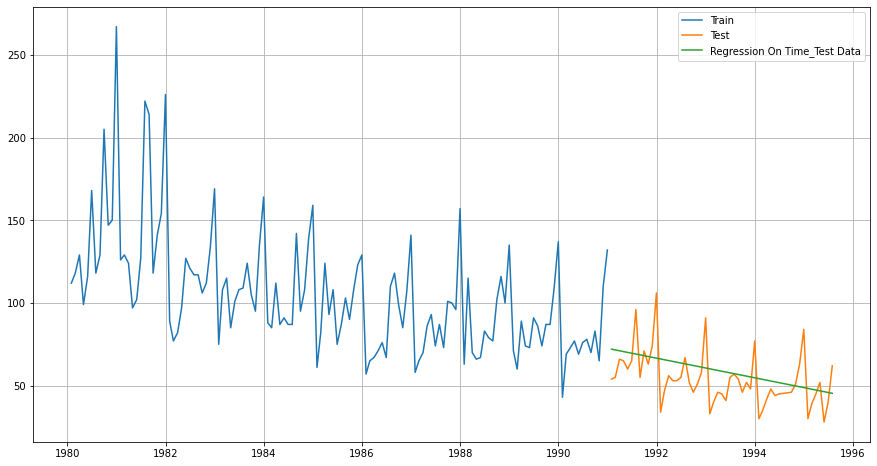

In [40]:
# Rose

rtrain_predictions_model1         = lrr.predict(LinearRegression_rtrain[['time']])
LinearRegression_rtrain['RegOnTime'] = rtrain_predictions_model1

rtest_predictions_model1         = lrr.predict(LinearRegression_rtest[['time']])
LinearRegression_rtest['RegOnTime'] = rtest_predictions_model1

plt.figure(figsize = (15,8))
plt.plot(rTrain['Rose'], label='Train')
plt.plot(rTest['Rose'], label='Test')
plt.plot(LinearRegression_rtest['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [41]:
from sklearn import metrics

rmse_model1_stest = metrics.mean_squared_error(sTest['Sparkling'],stest_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data (Sparkling),  RMSE is %3.3f " %(rmse_model1_stest))

rmse_model1_rtest = metrics.mean_squared_error(rTest['Rose'],rtest_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data (Rose),  RMSE is %3.3f " %(rmse_model1_rtest))

For RegressionOnTime forecast on the Test Data (Sparkling),  RMSE is 1389.135 
For RegressionOnTime forecast on the Test Data (Rose),  RMSE is 15.269 


In [42]:
resultsDf = pd.DataFrame({'Test RMSE (Sparkling)': [rmse_model1_stest],'Test RMSE (Rose)': [rmse_model1_rtest]},index=['RegressionOnTime'])
resultsDf

,Test RMSE (Sparkling),Test RMSE (Rose)
RegressionOnTime,1389.135175,15.268955


#### 2. Naive Approach: $\hat{y}_{t+1} = y_t$

In [43]:
# Sparkling
NaiveModel_strain = sTrain.copy()
NaiveModel_stest = sTest.copy()

# Rose
NaiveModel_rtrain = rTrain.copy()
NaiveModel_rtest = rTest.copy()

In [44]:
import numpy as np

In [45]:
NaiveModel_stest['naive'] = np.asarray(sTrain['Sparkling'])[len(np.asarray(sTrain['Sparkling']))-1]

NaiveModel_rtest['naive'] = np.asarray(rTrain['Rose'])[len(np.asarray(rTrain['Rose']))-1]

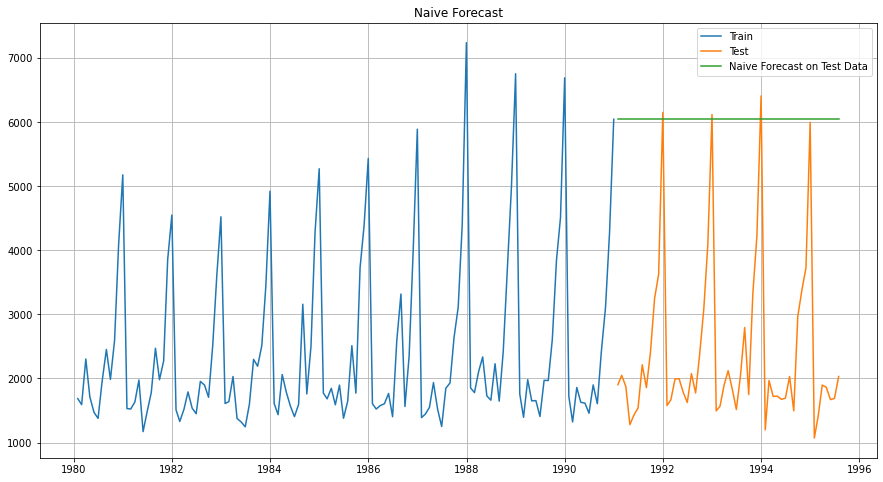

In [46]:
plt.figure(figsize = (15,8))
plt.plot(NaiveModel_strain['Sparkling'], label='Train')
plt.plot(sTest['Sparkling'], label='Test')

plt.plot(NaiveModel_stest['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

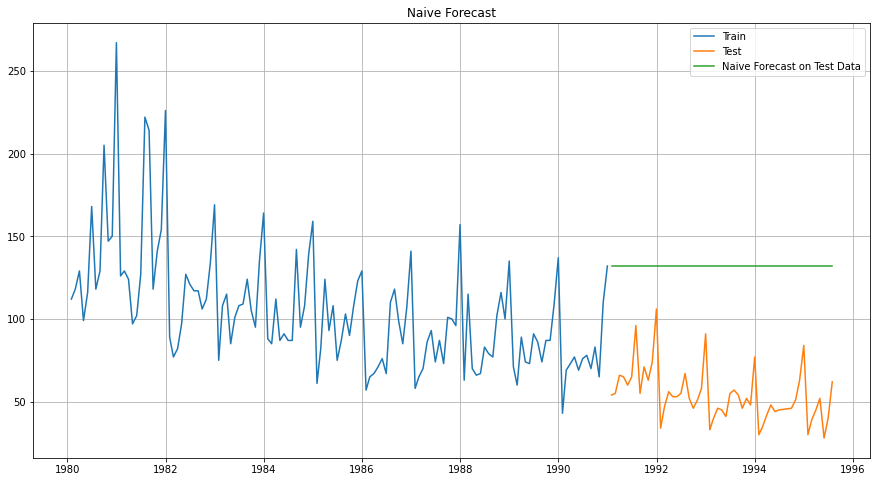

In [47]:
plt.figure(figsize = (15,8))
plt.plot(NaiveModel_rtrain['Rose'], label='Train')
plt.plot(rTest['Rose'], label='Test')

plt.plot(NaiveModel_rtest['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [48]:
rmse_model2_stest = metrics.mean_squared_error(sTest['Sparkling'],NaiveModel_stest['naive'],squared=False)
rmse_model2_rtest = metrics.mean_squared_error(rTest['Rose'],NaiveModel_stest['naive'],squared=False)

In [49]:
resultsDf_2 = pd.DataFrame({'Test RMSE (Sparkling)': [rmse_model2_stest],'Test RMSE (Rose)': [rmse_model2_rtest]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE (Sparkling),Test RMSE (Rose)
RegressionOnTime,1389.135175,15.268955
NaiveModel,3864.279352,5993.166176


#### 3. Simple Average

In [50]:
# Sparkling
SimpleAverage_strain = sTrain.copy()
SimpleAverage_stest = sTest.copy()

# Rose
SimpleAverage_rtrain = rTrain.copy()
SimpleAverage_rtest = rTest.copy()

In [51]:
SimpleAverage_stest['mean_forecast'] = sTrain['Sparkling'].mean()
SimpleAverage_rtest['mean_forecast'] = rTrain['Rose'].mean()

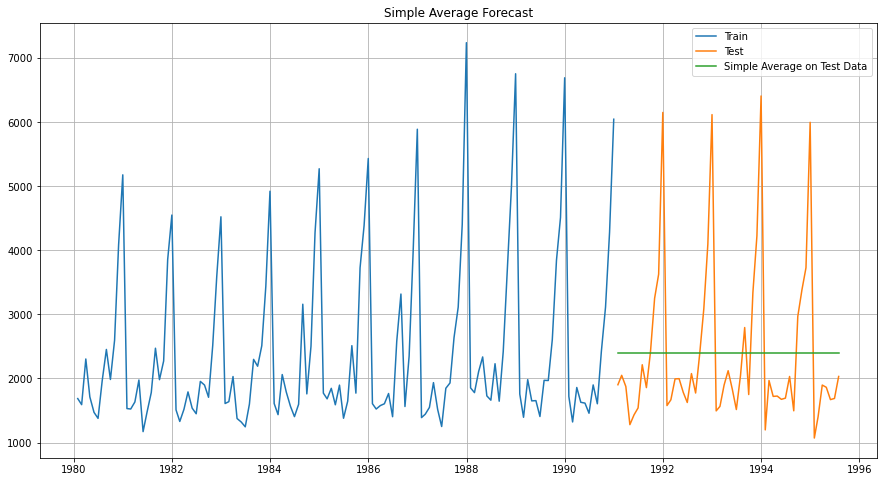

In [52]:
plt.figure(figsize = (15,8))
plt.plot(SimpleAverage_strain['Sparkling'], label='Train')
plt.plot(SimpleAverage_stest['Sparkling'], label='Test')

plt.plot(SimpleAverage_stest['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

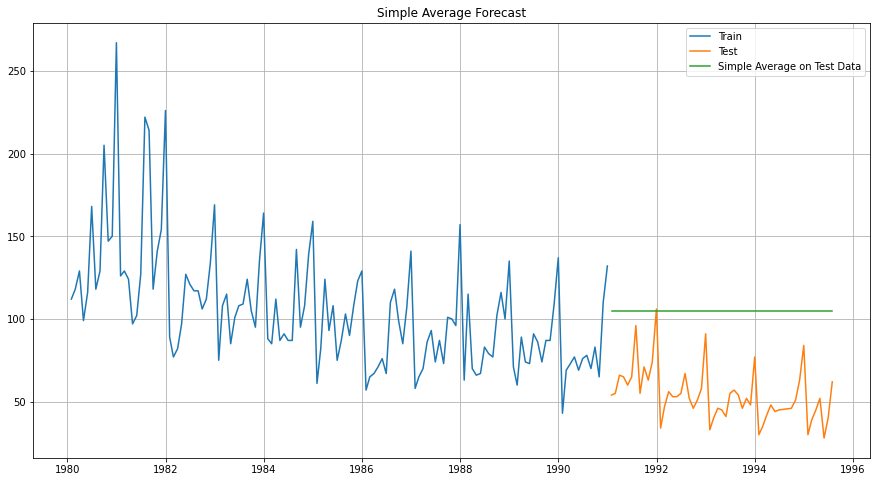

In [53]:
plt.figure(figsize = (15,8))
plt.plot(SimpleAverage_rtrain['Rose'], label='Train')
plt.plot(SimpleAverage_rtest['Rose'], label='Test')

plt.plot(SimpleAverage_rtest['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [54]:
rmse_model3_stest = metrics.mean_squared_error(sTest['Sparkling'],SimpleAverage_stest['mean_forecast'],squared=False)
rmse_model3_rtest = metrics.mean_squared_error(rTest['Rose'],SimpleAverage_rtest['mean_forecast'],squared=False)

In [55]:
resultsDf_3 = pd.DataFrame({'Test RMSE (Sparkling)': [rmse_model3_stest],'Test RMSE (Rose)': [rmse_model3_rtest]},index=['SimpleAvgModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE (Sparkling),Test RMSE (Rose)
RegressionOnTime,1389.135175,15.268955
NaiveModel,3864.279352,5993.166176
SimpleAvgModel,1275.081804,53.460570


#### 4. Moving Average

In [56]:
sMovingAverage = sdf.copy()
rMovingAverage = rdf.copy()

In [57]:
# Sparkling
sMovingAverage['Trailing_2'] = sMovingAverage['Sparkling'].rolling(2).mean()
sMovingAverage['Trailing_4'] = sMovingAverage['Sparkling'].rolling(4).mean()
sMovingAverage['Trailing_6'] = sMovingAverage['Sparkling'].rolling(6).mean()
sMovingAverage['Trailing_9'] = sMovingAverage['Sparkling'].rolling(9).mean()

# Rose
rMovingAverage['Trailing_2'] = rMovingAverage['Rose'].rolling(2).mean()
rMovingAverage['Trailing_4'] = rMovingAverage['Rose'].rolling(4).mean()
rMovingAverage['Trailing_6'] = rMovingAverage['Rose'].rolling(6).mean()
rMovingAverage['Trailing_9'] = rMovingAverage['Rose'].rolling(9).mean()

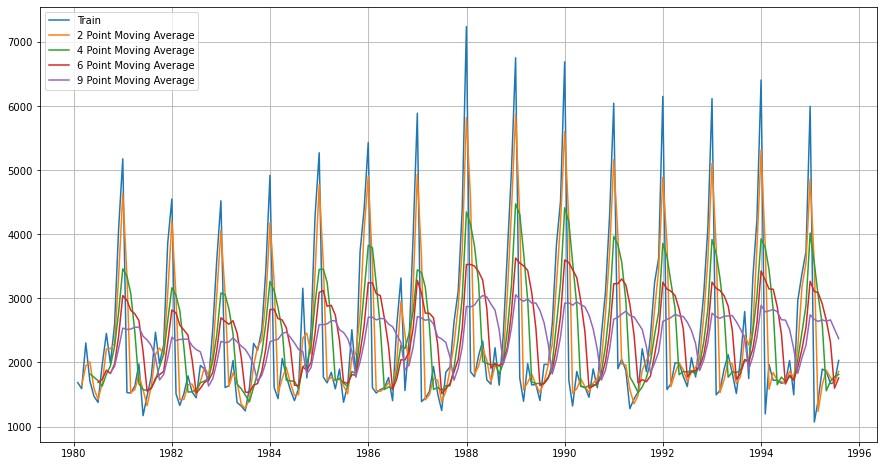

In [58]:
## Plotting on the Sparkling data

plt.figure(figsize = (15,8))
plt.plot(sMovingAverage['Sparkling'], label='Train')
plt.plot(sMovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(sMovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(sMovingAverage['Trailing_6'], label = '6 Point Moving Average')
plt.plot(sMovingAverage['Trailing_9'], label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

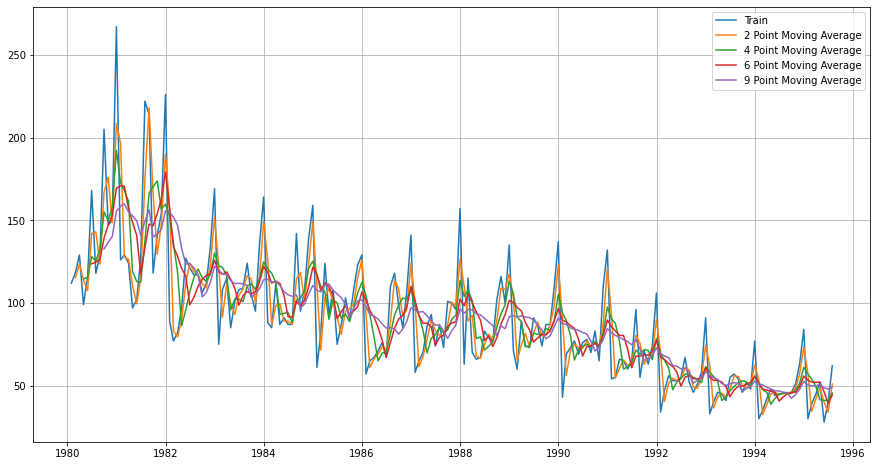

In [59]:
## Plotting on the Rose data

plt.figure(figsize = (15,8))
plt.plot(rMovingAverage['Rose'], label='Train')
plt.plot(rMovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(rMovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(rMovingAverage['Trailing_6'], label = '6 Point Moving Average')
plt.plot(rMovingAverage['Trailing_9'], label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [60]:
#Creating train and test set (Sparking)
strailing_MA_strain = sMovingAverage[sMovingAverage.index.year < 1991] 
strailing_MA_test = sMovingAverage[sMovingAverage.index.year >= 1991]

#Creating train and test set (Rose)
rtrailing_MA_strain = rMovingAverage[rMovingAverage.index.year < 1991] 
rtrailing_MA_test = rMovingAverage[rMovingAverage.index.year >= 1991]

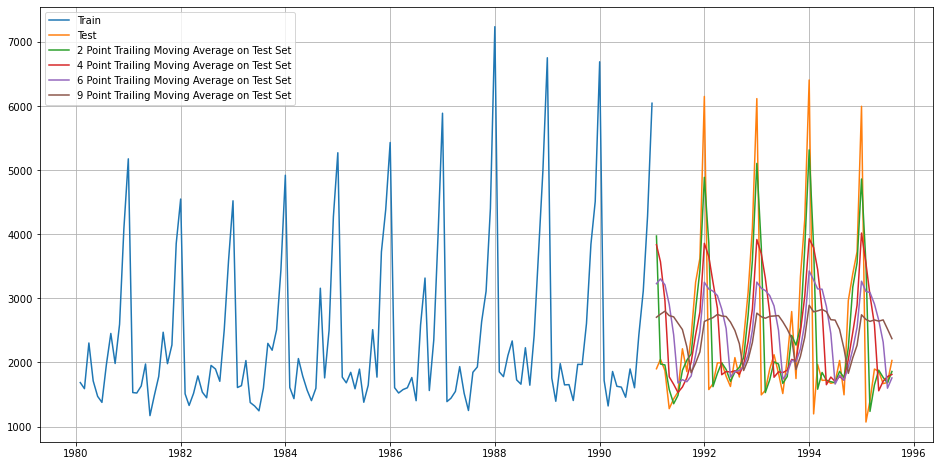

In [61]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(strailing_MA_strain['Sparkling'], label='Train')
plt.plot(strailing_MA_test['Sparkling'], label='Test')


plt.plot(strailing_MA_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(strailing_MA_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(strailing_MA_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(strailing_MA_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

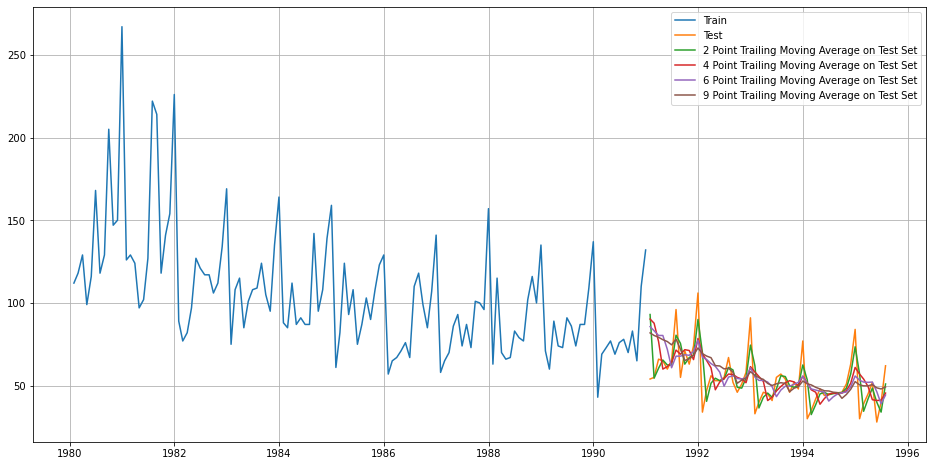

In [62]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(rtrailing_MA_strain['Rose'], label='Train')
plt.plot(rtrailing_MA_test['Rose'], label='Test')


plt.plot(rtrailing_MA_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(rtrailing_MA_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(rtrailing_MA_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(rtrailing_MA_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [63]:
# Sparkling

rmse_model4_stest_2 = metrics.mean_squared_error(sTest['Sparkling'],strailing_MA_test['Trailing_2'],squared=False)
rmse_model4_stest_4 = metrics.mean_squared_error(sTest['Sparkling'],strailing_MA_test['Trailing_4'],squared=False)
rmse_model4_stest_6 = metrics.mean_squared_error(sTest['Sparkling'],strailing_MA_test['Trailing_6'],squared=False)
rmse_model4_stest_9 = metrics.mean_squared_error(sTest['Sparkling'],strailing_MA_test['Trailing_9'],squared=False)

# Rose

rmse_model4_rtest_2 = metrics.mean_squared_error(rTest['Rose'],rtrailing_MA_test['Trailing_2'],squared=False)
rmse_model4_rtest_4 = metrics.mean_squared_error(rTest['Rose'],rtrailing_MA_test['Trailing_4'],squared=False)
rmse_model4_rtest_6 = metrics.mean_squared_error(rTest['Rose'],rtrailing_MA_test['Trailing_6'],squared=False)
rmse_model4_rtest_9 = metrics.mean_squared_error(rTest['Rose'],rtrailing_MA_test['Trailing_9'],squared=False)

In [64]:
resultsDf_4 = pd.DataFrame({'Test RMSE (Sparkling)': [rmse_model4_stest_2,rmse_model4_stest_4,rmse_model4_stest_6,rmse_model4_stest_9]
                           ,'Test RMSE (Rose)': [rmse_model4_rtest_2,rmse_model4_rtest_4,rmse_model4_rtest_6,rmse_model4_rtest_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage','6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE (Sparkling),Test RMSE (Rose)
RegressionOnTime,1389.135175,15.268955
NaiveModel,3864.279352,5993.166176
SimpleAvgModel,1275.081804,53.460570
2pointTrailingMovingAverage,813.400684,11.529278
4pointTrailingMovingAverage,1156.589694,14.451403
6pointTrailingMovingAverage,1283.927428,14.566327
9pointTrailingMovingAverage,1346.278315,14.727630


#### 5. Simple Exponential Smoothing with additive errors

In [65]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display

In [66]:
model_sSES = SimpleExpSmoothing(sTrain,initialization_method='estimated')
model_rSES = SimpleExpSmoothing(rTrain,initialization_method='estimated')

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [67]:
model_sSES_autofit = model_sSES.fit(optimized=True)
model_rSES_autofit = model_rSES.fit(optimized=True)

D:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [68]:
print(model_sSES_autofit.params)
print(model_rSES_autofit.params)

{'smoothing_level': 0.07029120765764557, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1764.0137060346985, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
{'smoothing_level': 0.09874983698117956, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 134.38702481818487, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [69]:
sSES_predict = model_sSES_autofit.forecast(steps=len(sTest))
rSES_predict = model_rSES_autofit.forecast(steps=len(rTest))

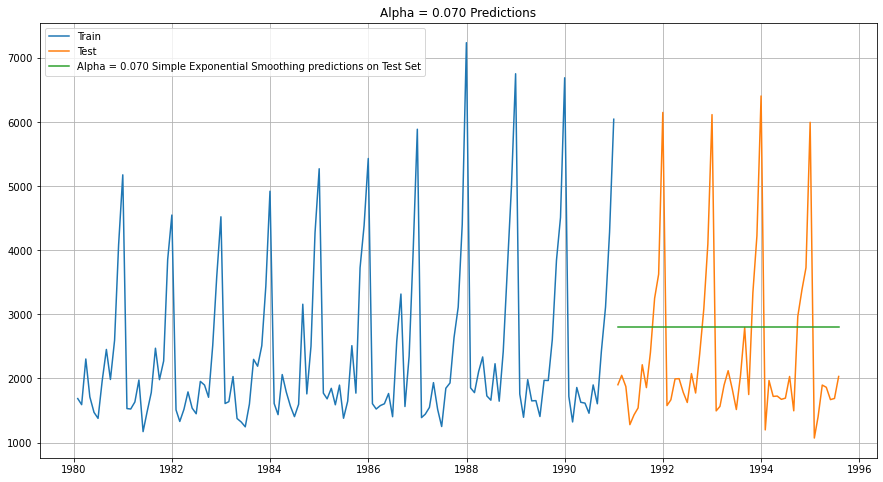

In [70]:
## Plotting the Training data, Test data and the forecasted values

plt.figure(figsize = (15,8))
plt.plot(sTrain, label='Train')
plt.plot(sTest, label='Test')

plt.plot(sSES_predict, label='Alpha = 0.070 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.070 Predictions');

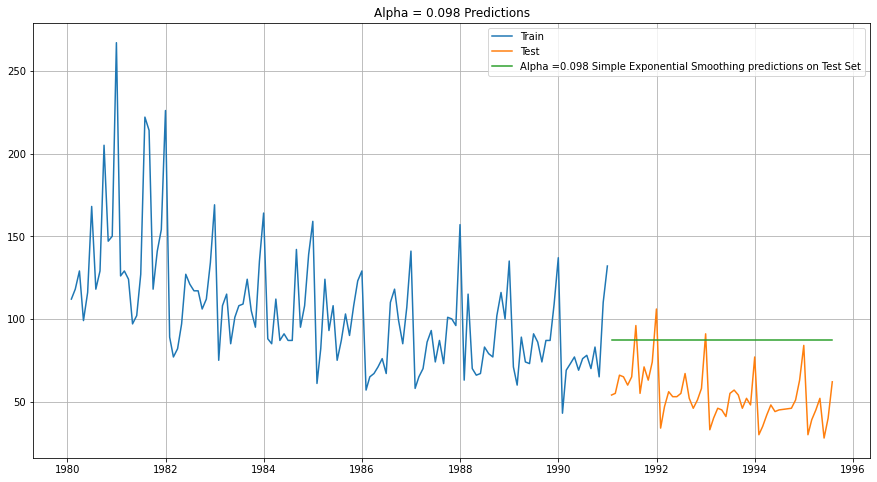

In [71]:
## Plotting the Training data, Test data and the forecasted values

plt.figure(figsize = (15,8))
plt.plot(rTrain, label='Train')
plt.plot(rTest, label='Test')

plt.plot(rSES_predict, label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.098 Predictions');

In [72]:
rmse_model5_stest = mean_squared_error(sTest.values,sSES_predict.values,squared=False)
rmse_model5_rtest = mean_squared_error(rTest.values,rSES_predict.values,squared=False)

In [73]:
resultsDf_1 = pd.DataFrame({'Test RMSE (Sparkling)': [rmse_model5_stest],'Test RMSE (Rose)': [rmse_model5_rtest]},index=['SES'])

resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf

,Test RMSE (Sparkling),Test RMSE (Rose)
RegressionOnTime,1389.135175,15.268955
NaiveModel,3864.279352,5993.166176
SimpleAvgModel,1275.081804,53.460570
2pointTrailingMovingAverage,813.400684,11.529278
4pointTrailingMovingAverage,1156.589694,14.451403
6pointTrailingMovingAverage,1283.927428,14.566327
9pointTrailingMovingAverage,1346.278315,14.727630
SES,1338.008384,36.796241


#### 6. Double Exponential Smoothing (Halt's Linear)

In [74]:
model_sDES = Holt(sTrain,initialization_method='estimated')
model_sDES = model_sDES.fit(optimized=True)

model_rDES = Holt(rTrain,initialization_method='estimated')
model_rDES = model_rDES.fit(optimized=True)

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [75]:
print('==Holt model Exponential Smoothing Estimated Parameters (Sparkling) ==\n')
print(model_sDES.params)
print('==Holt model Exponential Smoothing Estimated Parameters (Rose) ==\n')
print(model_rDES.params)

==Holt model Exponential Smoothing Estimated Parameters (Sparkling) ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
==Holt model Exponential Smoothing Estimated Parameters (Rose) ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [76]:
sDES_predict =  model_sDES.forecast(len(sTest))
rDES_predict =  model_rDES.forecast(len(rTest))

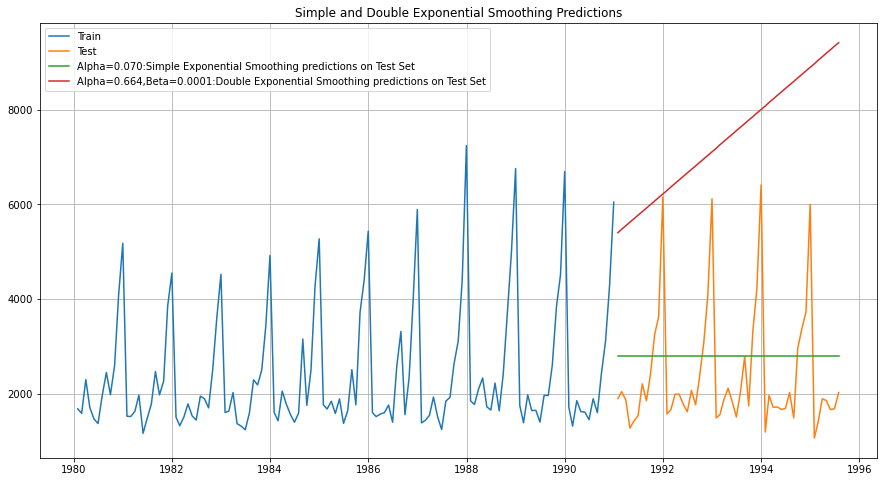

In [77]:
## Plotting the Training data, Test data and the forecasted values

plt.figure(figsize = (15,8))
plt.plot(sTrain, label='Train')
plt.plot(sTest, label='Test')

plt.plot(sSES_predict, label='Alpha=0.070:Simple Exponential Smoothing predictions on Test Set')
plt.plot(sDES_predict, label='Alpha=0.664,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

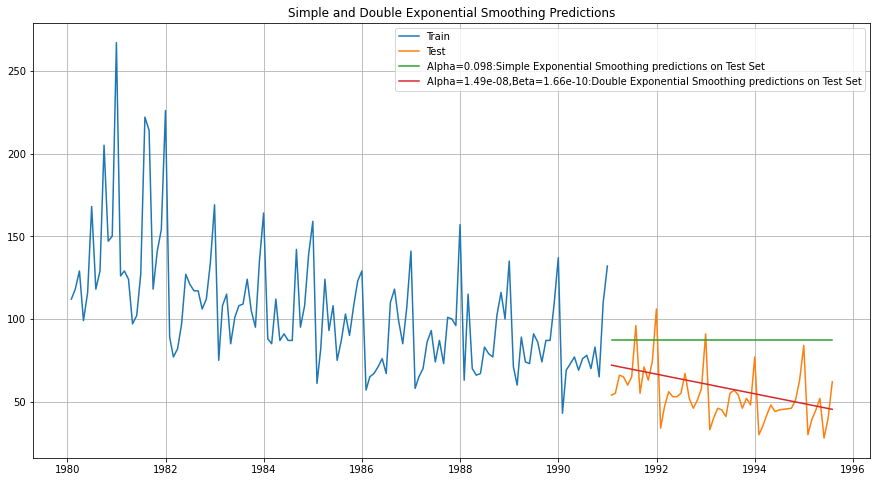

In [78]:
## Plotting the Training data, Test data and the forecasted values

plt.figure(figsize = (15,8))
plt.plot(rTrain, label='Train')
plt.plot(rTest, label='Test')

plt.plot(rSES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(rDES_predict, label='Alpha=1.49e-08,Beta=1.66e-10:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [79]:
rmse_model6_stest = mean_squared_error(sTest.values,sDES_predict.values,squared=False)
rmse_model6_rtest = mean_squared_error(rTest.values,rDES_predict.values,squared=False)

In [80]:
resultsDf_1 = pd.DataFrame({'Test RMSE (Sparkling)': [rmse_model6_stest],'Test RMSE (Rose)': [rmse_model6_rtest]},index=['DES'])

resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf

,Test RMSE (Sparkling),Test RMSE (Rose)
RegressionOnTime,1389.135175,15.268955
NaiveModel,3864.279352,5993.166176
SimpleAvgModel,1275.081804,53.460570
2pointTrailingMovingAverage,813.400684,11.529278
4pointTrailingMovingAverage,1156.589694,14.451403
6pointTrailingMovingAverage,1283.927428,14.566327
9pointTrailingMovingAverage,1346.278315,14.727630
SES,1338.008384,36.796241
DES,5291.879833,15.268944


#### 7. Holt Winter's linear method with additive errors

In [81]:
model_sTES = ExponentialSmoothing(sTrain,trend='additive',seasonal='multiplicative',initialization_method='estimated')
model_sTES = model_sTES.fit()

model_rTES = ExponentialSmoothing(rTrain,trend='additive',seasonal='multiplicative',initialization_method='estimated')
model_rTES = model_rTES.fit()

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [82]:
print('==Holt Winters model Exponential Smoothing Estimated Parameters (Sparkling) ==\n')
print(model_sTES.params)

print('==Holt Winters model Exponential Smoothing Estimated Parameters (Rose) ==\n')
print(model_rTES.params)

==Holt Winters model Exponential Smoothing Estimated Parameters (Sparkling) ==

{'smoothing_level': 0.11133818361298699, 'smoothing_trend': 0.049505131019509915, 'smoothing_seasonal': 0.3620795793580111, 'damping_trend': nan, 'initial_level': 2356.4967888704355, 'initial_trend': -10.187944726007238, 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
       0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
       1.87340336, 2.37811768]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
==Holt Winters model Exponential Smoothing Estimated Parameters (Rose) ==

{'smoothing_level': 0.0715106306609405, 'smoothing_trend': 0.04529179757535142, 'smoothing_seasonal': 7.244325029450242e-05, 'damping_trend': nan, 'initial_level': 130.40839142502193, 'initial_trend': -0.77985743179386, 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
       1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
       

In [83]:
sTES_predict =  model_sTES.forecast(len(sTest))
rTES_predict =  model_rTES.forecast(len(rTest))

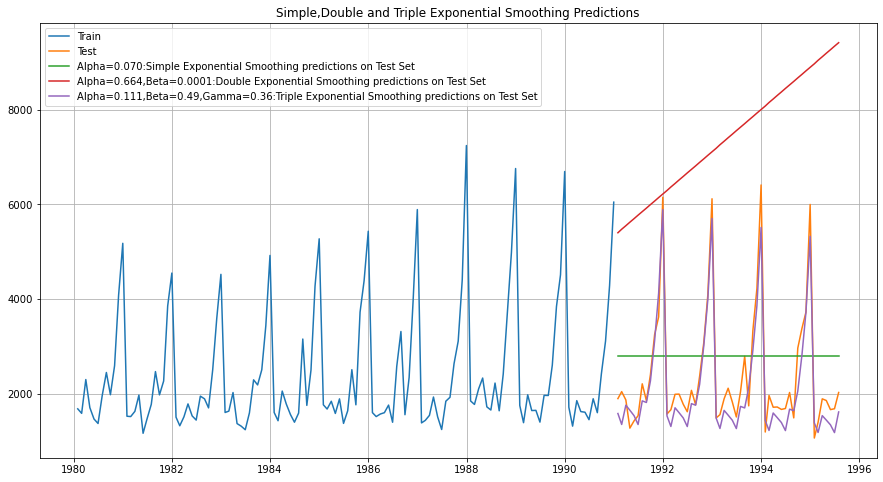

In [84]:
# Sparkling

plt.figure(figsize = (15,8))
plt.plot(sTrain, label='Train')
plt.plot(sTest, label='Test')

plt.plot(sSES_predict, label='Alpha=0.070:Simple Exponential Smoothing predictions on Test Set')
plt.plot(sDES_predict, label='Alpha=0.664,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(sTES_predict, label='Alpha=0.111,Beta=0.49,Gamma=0.36:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

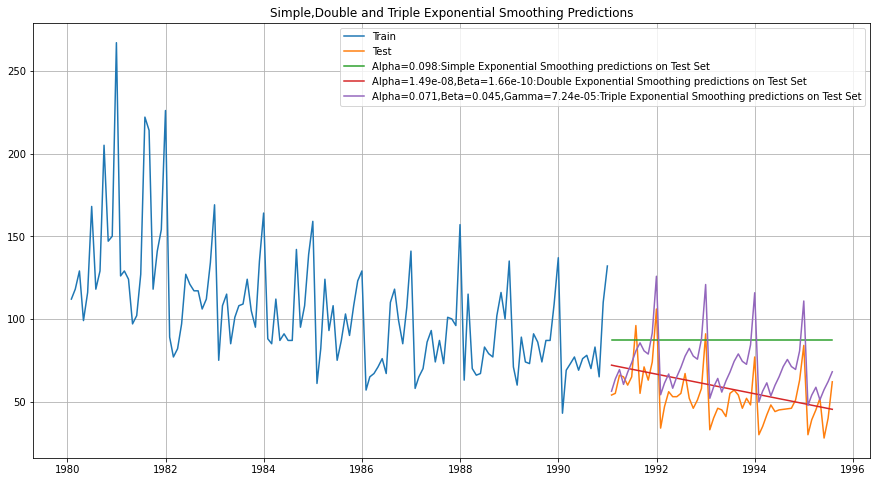

In [85]:
# Rose

plt.figure(figsize = (15,8))
plt.plot(rTrain, label='Train')
plt.plot(rTest, label='Test')

plt.plot(rSES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(rDES_predict, label='Alpha=1.49e-08,Beta=1.66e-10:Double Exponential Smoothing predictions on Test Set')
plt.plot(rTES_predict, label='Alpha=0.071,Beta=0.045,Gamma=7.24e-05:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [86]:
rmse_model7_stest = mean_squared_error(sTest.values,sTES_predict.values,squared=False)
rmse_model7_rtest = mean_squared_error(rTest.values,rTES_predict.values,squared=False)

In [87]:
resultsDf_1 = pd.DataFrame({'Test RMSE (Sparkling)': [rmse_model7_stest],'Test RMSE (Rose)': [rmse_model7_rtest]},index=['TES'])

resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf

,Test RMSE (Sparkling),Test RMSE (Rose)
RegressionOnTime,1389.135175,15.268955
NaiveModel,3864.279352,5993.166176
SimpleAvgModel,1275.081804,53.460570
2pointTrailingMovingAverage,813.400684,11.529278
4pointTrailingMovingAverage,1156.589694,14.451403
6pointTrailingMovingAverage,1283.927428,14.566327
9pointTrailingMovingAverage,1346.278315,14.727630
SES,1338.008384,36.796241
DES,5291.879833,15.268944
TES,404.286809,20.156763


### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
***Note: Stationarity should be checked at alpha = 0.05.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

In [88]:
from statsmodels.tsa.stattools import adfuller

In [89]:
# Sparkling
dftest = adfuller(sdf,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932753
Number of lags used 12


In [90]:
# Rose
dftest = adfuller(rdf,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.240
DF test p-value is 0.4671371627793097
Number of lags used 13


In [91]:
# Sparkling with 1 diff

dftest = adfuller(sdf.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


In [92]:
# Rose with 1 diff

dftest = adfuller(rdf.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.162
DF test p-value is 3.015976115826694e-11
Number of lags used 12


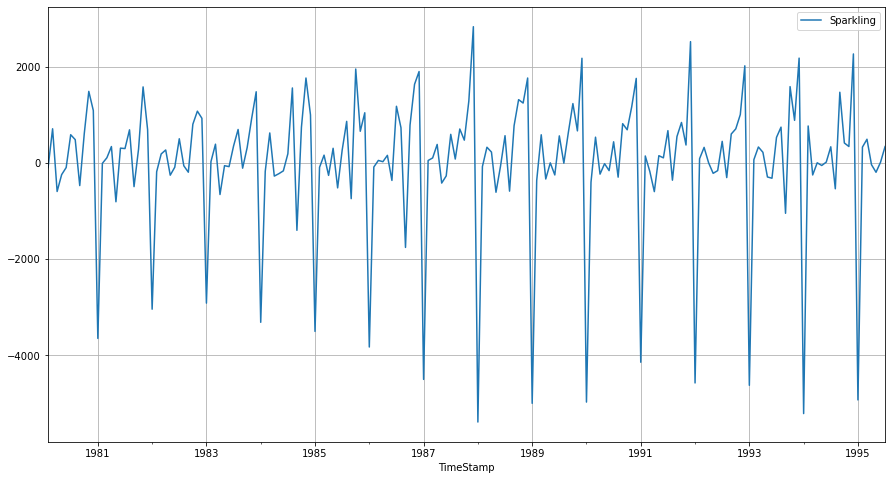

In [93]:
# Sparkling - Stationary Data
rcParams['figure.figsize'] = 15,8
sdf.diff().dropna().plot(grid=True);

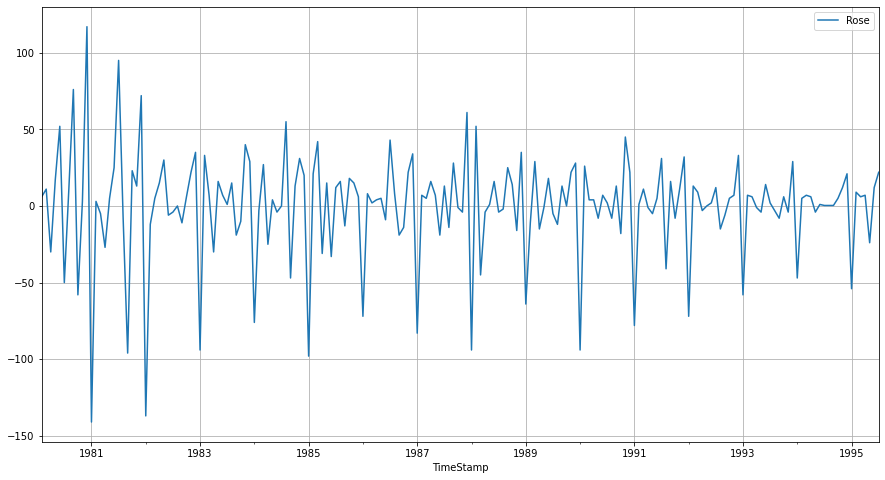

In [94]:
# Rose - Stationary Data
rdf.diff().dropna().plot(grid=True);

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [95]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 3
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

In [96]:
from statsmodels.tsa.arima.model import ARIMA

ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC (Sparkling)', 'AIC (Rose)'])

for param in pdq:
    ARIMA_smodel = ARIMA(sTrain['Sparkling'].values,order=param).fit()
    ARIMA_rmodel = ARIMA(rTrain['Rose'].values,order=param).fit()
    
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC (Sparkling)': ARIMA_smodel.aic, 'AIC (Rose)': ARIMA_rmodel.aic}, ignore_index=True)

D:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization

In [99]:
ARIMA_AIC.sort_values(by='AIC (Rose)',ascending=True).head()

,param,AIC (Sparkling),AIC (Rose)
11,"(2, 1, 3)",2232.921137,1274.694912
15,"(3, 1, 3)",2221.456610,1278.658866
2,"(0, 1, 2)",2234.408323,1279.671529
6,"(1, 1, 2)",2234.527200,1279.870723
3,"(0, 1, 3)",2233.994858,1280.545376


In [101]:
ARIMA_AIC.sort_values(by='AIC (Sparkling)',ascending=True).head()

,param,AIC (Sparkling),AIC (Rose)
10,"(2, 1, 2)",2213.509212,1281.870722
15,"(3, 1, 3)",2221.456610,1278.658866
14,"(3, 1, 2)",2230.759637,1283.720741
11,"(2, 1, 3)",2232.921137,1274.694912
9,"(2, 1, 1)",2233.777626,1281.507862


In [102]:
# Sparkling
auto_sARIMA = ARIMA(sTrain, order=(2,1,2))
results_auto_sARIMA = auto_sARIMA.fit()
print(results_auto_sARIMA.summary())

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 24 Apr 2022   AIC                           2213.509
Time:                        20:54:13   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

In [103]:
#Rose 
auto_rARIMA = ARIMA(rTrain, order=(2,1,3))
results_auto_rARIMA = auto_rARIMA.fit()
print(results_auto_rARIMA.summary())

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.347
Date:                Sun, 24 Apr 2022   AIC                           1274.695
Time:                        20:54:14   BIC                           1291.946
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -20.035      0.000      -1.842      -1.514
ar.L2         -0.7289      0.084     -8.703      0.000      -0.893      -0.565
ma.L1          1.0450      0.685      1.527      0.1

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


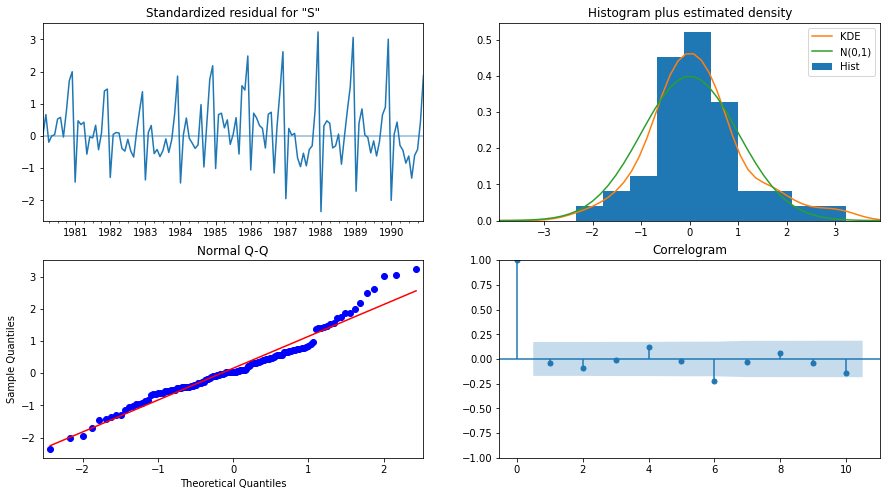

In [104]:
results_auto_sARIMA.plot_diagnostics();

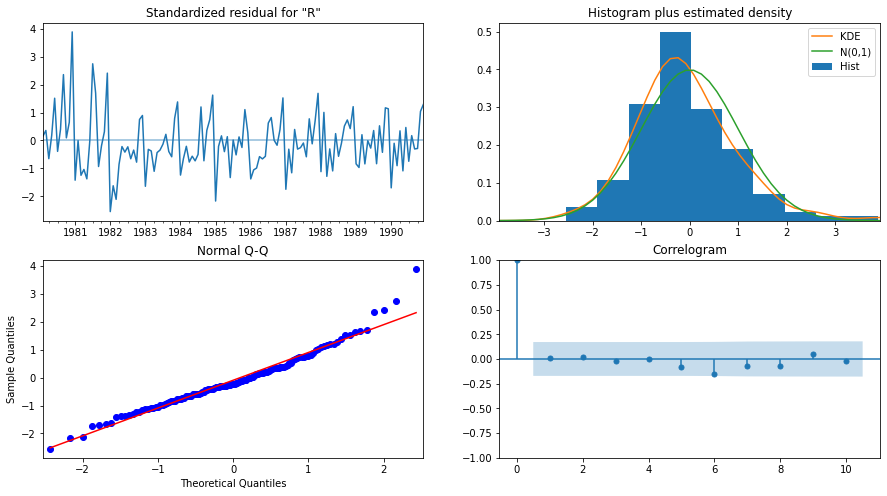

In [105]:
results_auto_rARIMA.plot_diagnostics();

In [106]:
predicted_auto_sARIMA = results_auto_sARIMA.forecast(steps=len(sTest))
predicted_auto_rARIMA = results_auto_rARIMA.forecast(steps=len(rTest))

In [107]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [108]:
Srmse = mean_squared_error(sTest['Sparkling'],predicted_auto_sARIMA,squared=False)
Smape = mean_absolute_percentage_error(sTest['Sparkling'],predicted_auto_sARIMA)
print('RMSE:',Srmse,'\nMAPE:',Smape)

RMSE: 1299.9795689481477 
MAPE: 47.099932436388684


In [109]:
Rrmse = mean_squared_error(rTest['Rose'],predicted_auto_rARIMA,squared=False)
Rmape = mean_absolute_percentage_error(rTest['Rose'],predicted_auto_rARIMA)
print('RMSE:',Rrmse,'\nMAPE:',Rmape)

RMSE: 36.81742323289034 
MAPE: 75.84837827903644


In [110]:
resultsDf = pd.DataFrame({'RMSE (Sparkling)': Srmse, 'MAPE (Sparkling)': Smape, 'RMSE (Rose)': Rrmse, 'MAPE (Rose)': Rmape} ,index=['ARIMA - Lowest AIC'])
resultsDf

,RMSE (Sparkling),MAPE (Sparkling),RMSE (Rose),MAPE (Rose)
ARIMA - Lowest AIC,1299.979569,47.099932,36.817423,75.848378


In [111]:

p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]

In [112]:
import statsmodels.api as sm

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal'])

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_smodel = sm.tsa.statespace.SARIMAX(sTrain['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        
        SARIMA_rmodel = sm.tsa.statespace.SARIMAX(rTrain['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_sSARIMA = SARIMA_smodel.fit(maxiter=1000)
        results_rSARIMA = SARIMA_rmodel.fit(maxiter=1000)
        
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC (Sparkling)': results_sSARIMA.aic, 'AIC (Rose)': results_rSARIMA.aic}, ignore_index=True)

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [113]:
SARIMA_AIC.sort_values(by='AIC (Sparkling)',ascending=True).head()

,param,seasonal,AIC (Rose),AIC (Sparkling)
187,"(2, 1, 3)","(2, 0, 3, 6)",951.744298,1629.150457
251,"(3, 1, 3)","(2, 0, 3, 6)",952.582104,1631.005181
59,"(0, 1, 3)","(2, 0, 3, 6)",952.073632,1633.327863
123,"(1, 1, 3)","(2, 0, 3, 6)",953.684951,1633.965960
63,"(0, 1, 3)","(3, 0, 3, 6)",954.049162,1635.054385


In [114]:
SARIMA_AIC.sort_values(by='AIC (Rose)',ascending=True).head()

,param,seasonal,AIC (Rose),AIC (Sparkling)
187,"(2, 1, 3)","(2, 0, 3, 6)",951.744298,1629.150457
59,"(0, 1, 3)","(2, 0, 3, 6)",952.073632,1633.327863
251,"(3, 1, 3)","(2, 0, 3, 6)",952.582104,1631.005181
191,"(2, 1, 3)","(3, 0, 3, 6)",953.205612,1638.070786
123,"(1, 1, 3)","(2, 0, 3, 6)",953.684951,1633.965960


In [115]:

auto_sSARIMA = sm.tsa.statespace.SARIMAX(sTrain['Sparkling'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_sSARIMA = auto_sSARIMA.fit(maxiter=1000)
print(results_auto_sSARIMA.summary())

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -803.575
Date:                           Sun, 24 Apr 2022   AIC                           1629.150
Time:                                   21:10:26   BIC                           1658.755
Sample:                               01-31-1980   HQIC                          1641.156
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7450      0.065    -27.006      0.000      -1.872      -1.618
ar.L2         -0.7871      0.069    -11.384

In [116]:

auto_rSARIMA = sm.tsa.statespace.SARIMAX(rTrain['Rose'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_rSARIMA = auto_rSARIMA.fit(maxiter=1000)
print(results_auto_rSARIMA.summary())

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -464.872
Date:                           Sun, 24 Apr 2022   AIC                            951.744
Time:                                   21:10:31   BIC                            981.349
Sample:                               01-31-1980   HQIC                           963.750
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5026      0.083     -6.079      0.000      -0.665      -0.341
ar.L2         -0.6627      0.084     -7.916

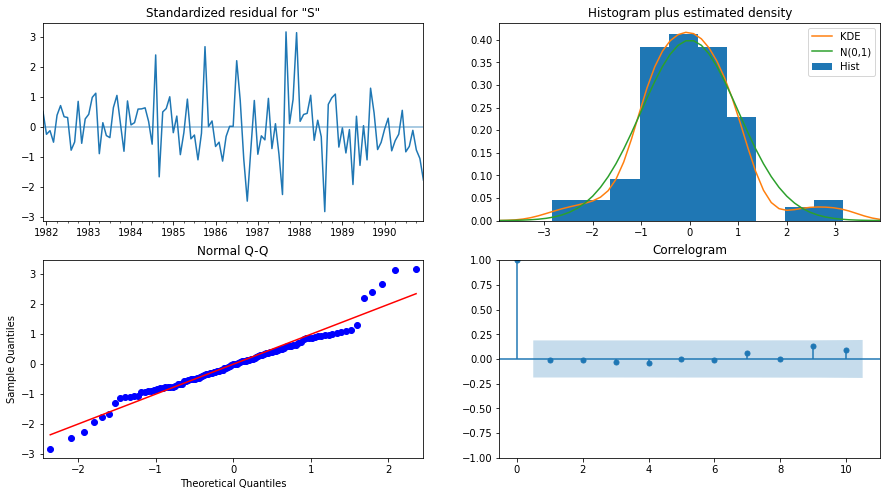

In [117]:
results_auto_sSARIMA.plot_diagnostics();

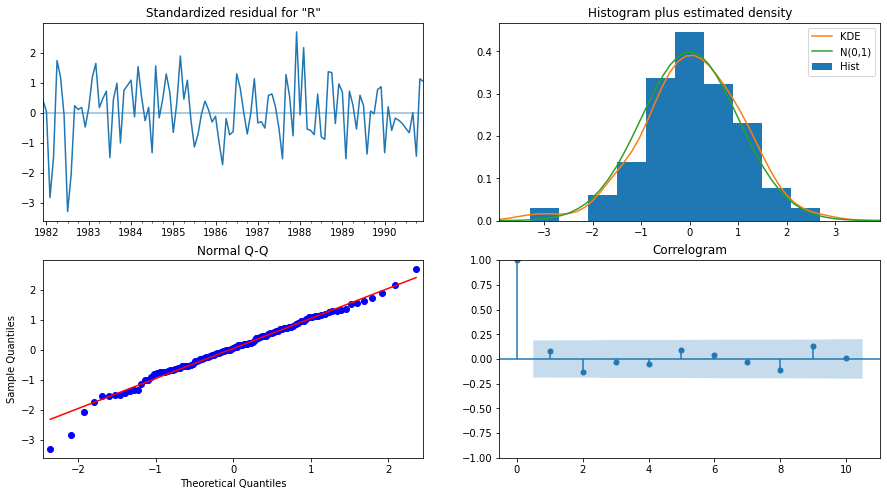

In [118]:
results_auto_rSARIMA.plot_diagnostics();

In [119]:
predicted_auto_sSARIMA = results_auto_sSARIMA.get_forecast(steps=len(sTest))
predicted_auto_rSARIMA = results_auto_rSARIMA.get_forecast(steps=len(rTest))

In [120]:
Srmse = mean_squared_error(sTest['Sparkling'],predicted_auto_sSARIMA.predicted_mean,squared=False)
Smape = mean_absolute_percentage_error(sTest['Sparkling'],predicted_auto_sSARIMA.predicted_mean)
print('RMSE:',Srmse,'\nMAPE:',Smape)

RMSE: 812.7472795618854 
MAPE: 35.75718587545582


In [121]:
Rrmse = mean_squared_error(rTest['Rose'],predicted_auto_rSARIMA.predicted_mean,squared=False)
Rmape = mean_absolute_percentage_error(rTest['Rose'],predicted_auto_rSARIMA.predicted_mean)
print('RMSE:',Rrmse,'\nMAPE:',Rmape)

RMSE: 27.124996954782564 
MAPE: 55.24079085724847


In [122]:
resultsDf_1 = pd.DataFrame({'RMSE (Sparkling)': Srmse, 'MAPE (Sparkling)': Smape, 'RMSE (Rose)': Rrmse, 'MAPE (Rose)': Rmape} ,index=['SARIMA - Lowest AIC'])
resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf

,RMSE (Sparkling),MAPE (Sparkling),RMSE (Rose),MAPE (Rose)
ARIMA - Lowest AIC,1299.979569,47.099932,36.817423,75.848378
SARIMA - Lowest AIC,812.747280,35.757186,27.124997,55.240791


### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [123]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

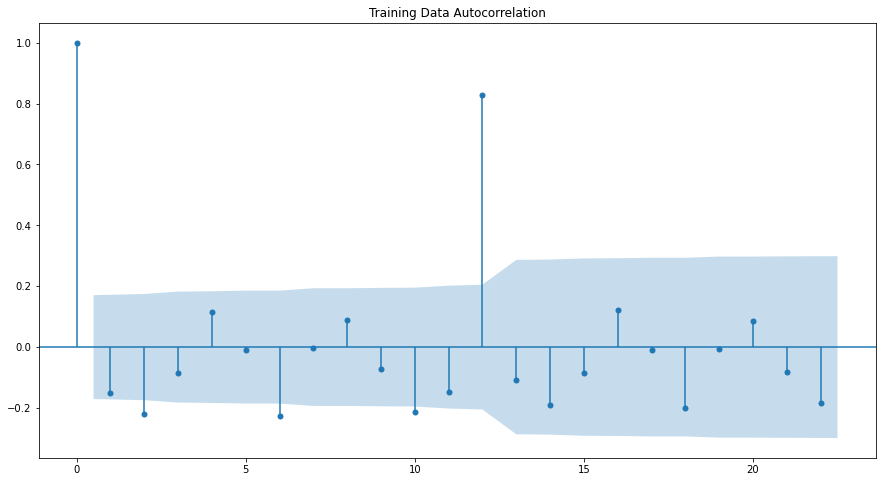

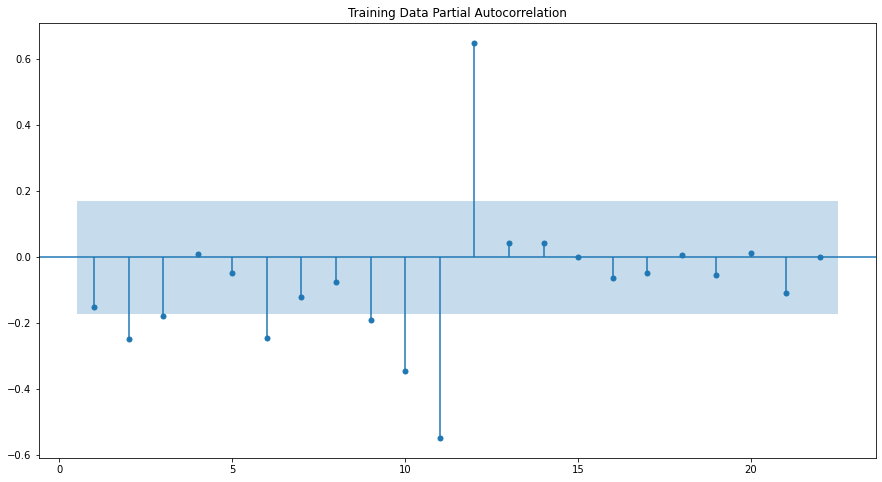

In [124]:
#Sparkling Wine

plot_acf(sTrain.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(sTrain.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

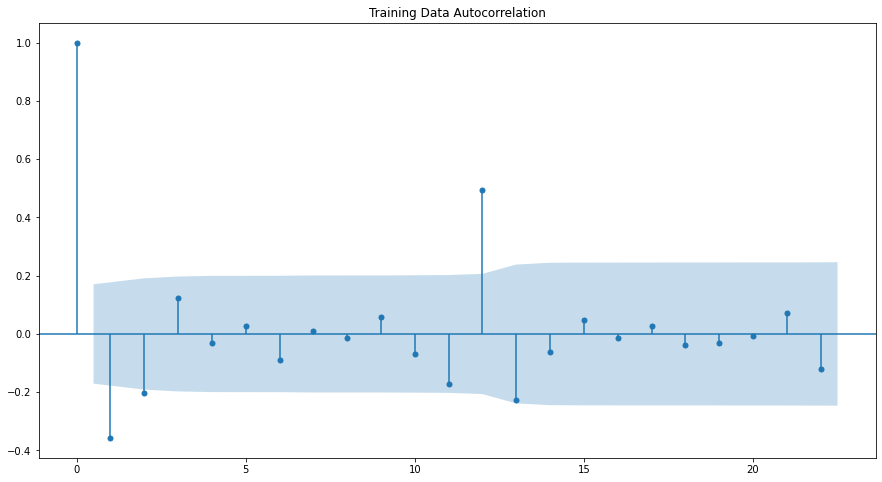

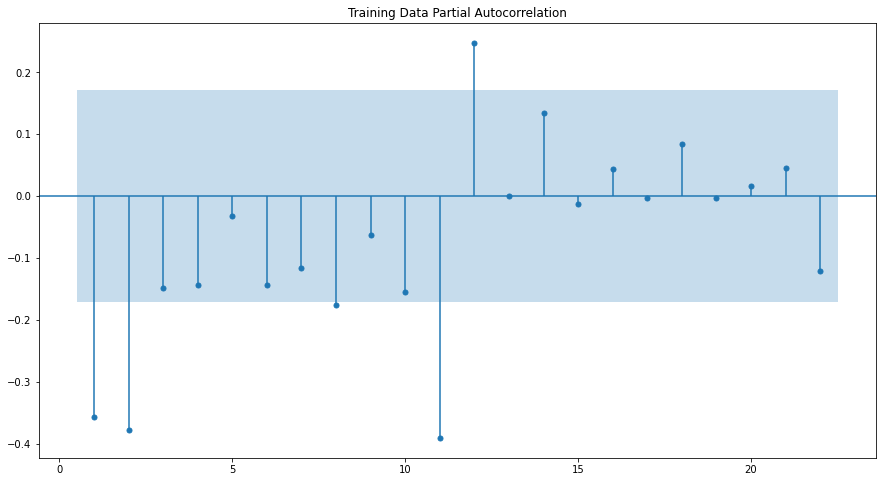

In [125]:
#Rose Wine

plot_acf(rTrain.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(rTrain.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [126]:
# Sparkling

manual_sARIMA = ARIMA(sTrain['Sparkling'], order=(0,1,0),freq='M')

results_manual_sARIMA = manual_sARIMA.fit()

print(results_manual_sARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sun, 24 Apr 2022   AIC                           2267.663
Time:                        21:10:37   BIC                           2270.538
Sample:                    01-31-1980   HQIC                          2268.831
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [127]:
# Rose

manual_rARIMA = ARIMA(rTrain['Rose'], order=(2,1,2),freq='M')

results_manual_rARIMA = manual_rARIMA.fit()

print(results_manual_rARIMA.summary())

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 24 Apr 2022   AIC                           1281.871
Time:                        21:10:37   BIC                           1296.247
Sample:                    01-31-1980   HQIC                          1287.712
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

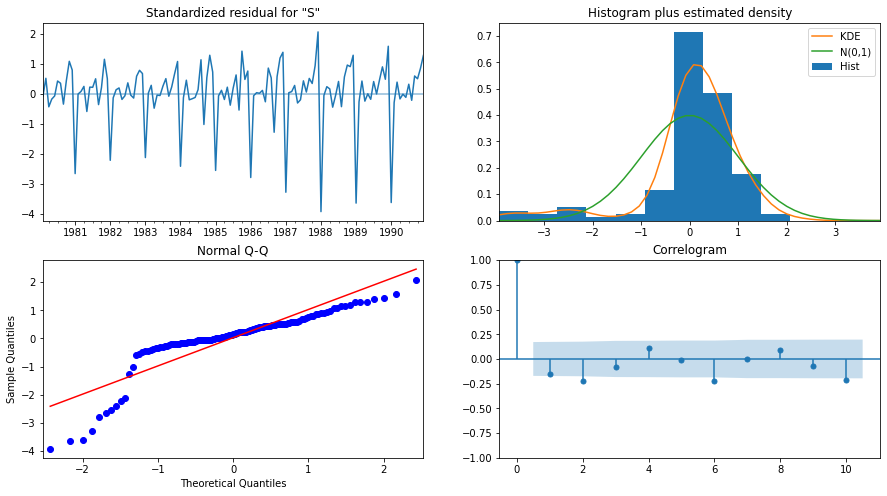

In [128]:
results_manual_sARIMA.plot_diagnostics();

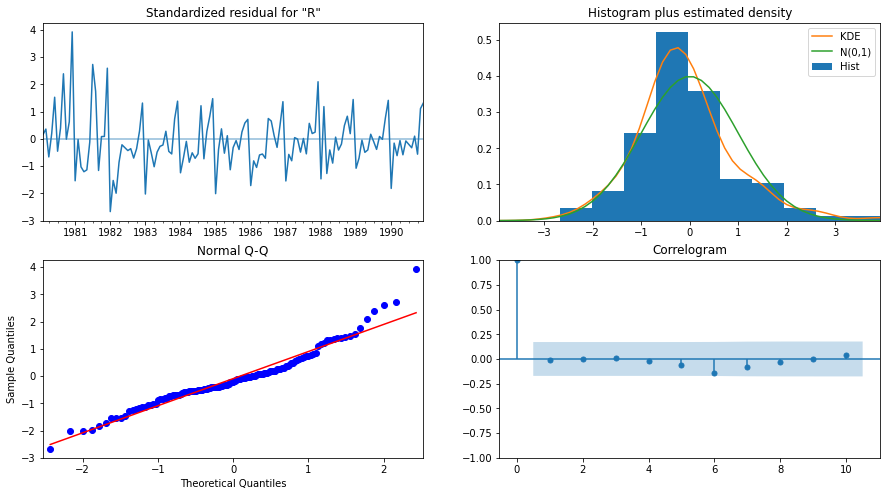

In [129]:
results_manual_rARIMA.plot_diagnostics();

In [130]:
predicted_manual_sARIMA = results_manual_sARIMA.forecast(steps=len(sTest))
predicted_manual_rARIMA = results_manual_rARIMA.forecast(steps=len(rTest))

In [131]:
Srmse = mean_squared_error(sTest['Sparkling'],predicted_manual_sARIMA,squared=False)
Smape = mean_absolute_percentage_error(sTest['Sparkling'],predicted_manual_sARIMA)
print('RMSE:',Srmse,'\nMAPE:',Smape)

RMSE: 3864.2793518443914 
MAPE: 201.32764950352743


In [132]:
Rrmse = mean_squared_error(rTest['Rose'],predicted_manual_rARIMA,squared=False)
Rmape = mean_absolute_percentage_error(rTest['Rose'],predicted_manual_rARIMA)
print('RMSE:',Rrmse,'\nMAPE:',Rmape)

RMSE: 36.871196622260655 
MAPE: 76.05621272333192


In [133]:
resultsDf_1 = pd.DataFrame({'RMSE (Sparkling)': Srmse, 'MAPE (Sparkling)': Smape, 'RMSE (Rose)': Rrmse, 'MAPE (Rose)': Rmape} ,index=['ARIMA - Manual (PCF/APCF)'])
resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf

,RMSE (Sparkling),MAPE (Sparkling),RMSE (Rose),MAPE (Rose)
ARIMA - Lowest AIC,1299.979569,47.099932,36.817423,75.848378
SARIMA - Lowest AIC,812.747280,35.757186,27.124997,55.240791
ARIMA - Manual (PCF/APCF),3864.279352,201.327650,36.871197,76.056213


In [134]:
#Sparkling
manual_sSARIMA = sm.tsa.statespace.SARIMAX(sTrain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(0, 0, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_sSARIMA = manual_sSARIMA.fit(maxiter=1000)
print(results_manual_sSARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1124.680
Date:                Sun, 24 Apr 2022   AIC                           2251.360
Time:                        21:10:42   BIC                           2254.227
Sample:                    01-31-1980   HQIC                          2252.525
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.899e+06   1.31e+05     14.543      0.000    1.64e+06    2.16e+06
Ljung-Box (L1) (Q):                   3.04   Jarque-Bera (JB):               194.29
Prob(Q):                              0.08   Pr

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [135]:
#Sparkling
manual_rSARIMA = sm.tsa.statespace.SARIMAX(rTrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_rSARIMA = manual_rSARIMA.fit(maxiter=1000)
print(results_manual_rSARIMA.summary())

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -513.610
Date:                           Sun, 24 Apr 2022   AIC                           1045.220
Time:                                   21:10:45   BIC                           1070.003
Sample:                               01-31-1980   HQIC                          1055.281
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0479      0.120      8.749      0.000       0.813       1.283
ar.L2         -0.2225      0.134     -1.662

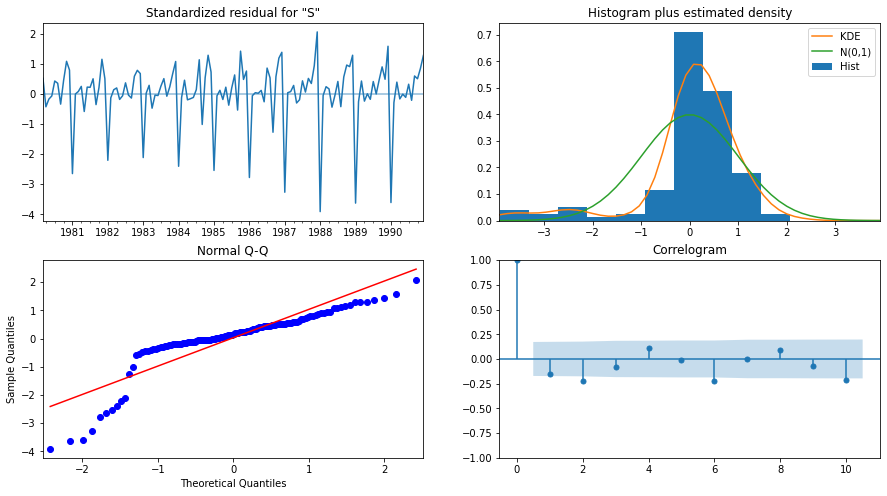

In [136]:
results_manual_sSARIMA.plot_diagnostics();

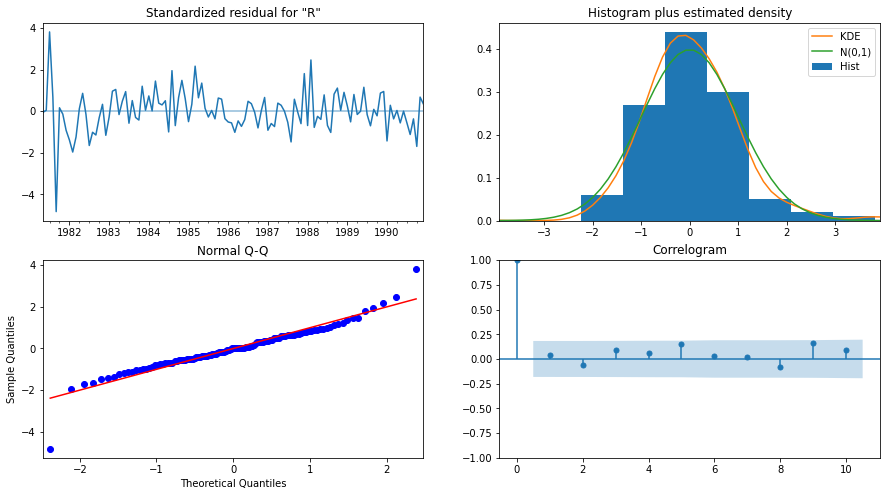

In [137]:
results_manual_rSARIMA.plot_diagnostics();

In [138]:
predicted_manual_sSARIMA = results_manual_rSARIMA.forecast(steps=len(sTest))
predicted_manual_rSARIMA = results_manual_rSARIMA.forecast(steps=len(rTest))

In [139]:
Srmse = mean_squared_error(sTest['Sparkling'],predicted_manual_sSARIMA,squared=False)
Smape = mean_absolute_percentage_error(sTest['Sparkling'],predicted_manual_sSARIMA)

Rrmse = mean_squared_error(rTest['Rose'],predicted_manual_rSARIMA,squared=False)
Rmape = mean_absolute_percentage_error(rTest['Rose'],predicted_manual_rSARIMA)

In [140]:
resultsDf_1 = pd.DataFrame({'RMSE (Sparkling)': Srmse, 'MAPE (Sparkling)': Smape, 'RMSE (Rose)': Rrmse, 'MAPE (Rose)': Rmape} ,index=['SARIMA - Manual (PCF/APCF)'])
resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf

,RMSE (Sparkling),MAPE (Sparkling),RMSE (Rose),MAPE (Rose)
ARIMA - Lowest AIC,1299.979569,47.099932,36.817423,75.848378
SARIMA - Lowest AIC,812.747280,35.757186,27.124997,55.240791
ARIMA - Manual (PCF/APCF),3864.279352,201.327650,36.871197,76.056213
SARIMA - Manual (PCF/APCF),2640.806467,96.012224,30.631352,62.657357


### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

At lowest AIC, SARIMA Model has decent RMSE drop (not the lowest) but considering the seasonality SARIMA should predict good values for us.

In [141]:
# Sparkling

Sfull_data_model = sm.tsa.statespace.SARIMAX(sdf['Sparkling'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Sresults = Sfull_data_model.fit(maxiter=1000)
print(Sresults.summary())

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  187
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood               -1208.621
Date:                           Sun, 24 Apr 2022   AIC                           2439.243
Time:                                   21:10:59   BIC                           2473.341
Sample:                               01-31-1980   HQIC                          2453.086
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3210      0.498      0.645      0.519      -0.655       1.297
ar.L2          0.2481      0.406      0.612

In [142]:
# Sparkling wine

predicted_sSARIMA_full = Sresults.get_forecast(steps=12)

predicted_sSARIMA_full = predicted_sSARIMA_full.summary_frame(alpha=0.05)
predicted_sSARIMA_full.head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1823.310454,374.978205,1088.366677,2558.254231
1995-09-30,2371.642353,380.303053,1626.262066,3117.022640
1995-10-31,3256.128140,380.526002,2510.310882,4001.945399
1995-11-30,4019.177846,381.308921,3271.826094,4766.529598
1995-12-31,6273.278578,381.709487,5525.141731,7021.415425


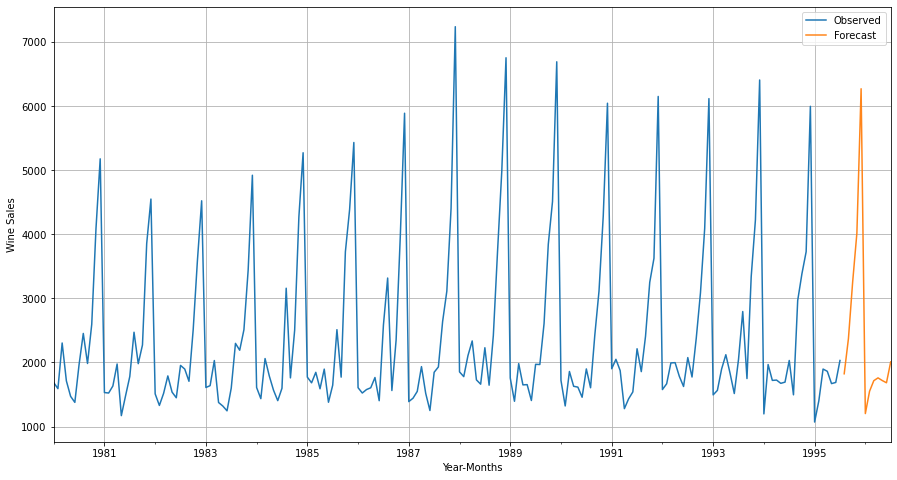

In [143]:
axis = sdf['Sparkling'].plot(label='Observed')
predicted_sSARIMA_full['mean'].plot(ax=axis, label='Forecast', alpha=0.95)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Wine Sales')
plt.legend(loc='best')
plt.grid();

In [144]:
# Sparkling

Rfull_data_model = sm.tsa.statespace.SARIMAX(rdf['Rose'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Rresults = Rfull_data_model.fit(maxiter=1000)
print(Rresults.summary())

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -675.235
Date:                           Sun, 24 Apr 2022   AIC                           1372.470
Time:                                   21:11:04   BIC                           1406.568
Sample:                               01-31-1980   HQIC                          1386.312
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5266      0.060     -8.710      0.000      -0.645      -0.408
ar.L2         -0.6852      0.054    -12.778

In [145]:
# Rose wine

predicted_rSARIMA_full = Rresults.get_forecast(steps=12)

predicted_rSARIMA_full = predicted_rSARIMA_full.summary_frame(alpha=0.05)
predicted_rSARIMA_full.head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,52.736646,14.292107,24.724631,80.748662
1995-09-30,45.723229,14.668511,16.973476,74.472982
1995-10-31,48.576440,14.905834,19.361542,77.791338
1995-11-30,54.282017,14.908419,25.062054,83.501980
1995-12-31,72.336184,15.004548,42.927811,101.744557


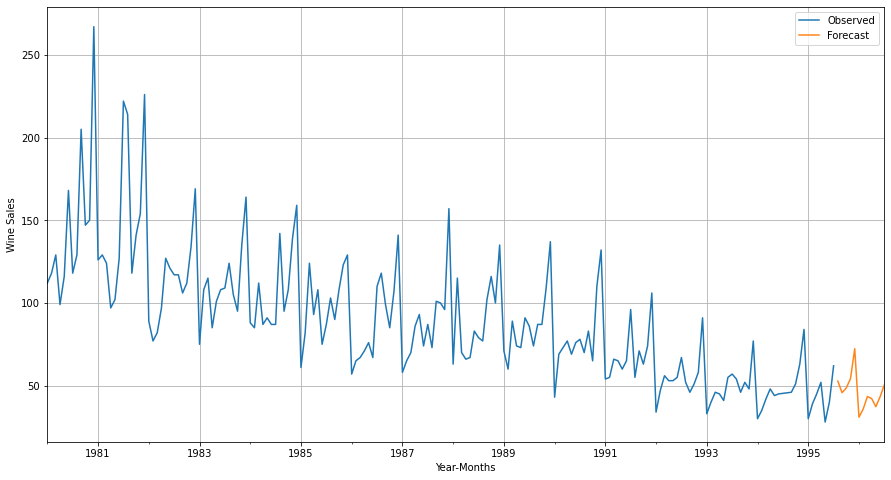

In [146]:
axis = rdf['Rose'].plot(label='Observed')
predicted_rSARIMA_full['mean'].plot(ax=axis, label='Forecast', alpha=0.95)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Wine Sales')
plt.legend(loc='best')
plt.grid();